In [1]:
import numpy as np
import pandas as pd
#from io import StringIO
import os
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
h = 9
w = h*1.61803398875
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 26}

plt.rc('font', **font)

#from matplotlib import rc
plt.rc('font',**{'family':'serif','serif':['Times New Roman']})
plt.rc('text', usetex=True)

In [2]:
Blast = 'surface'

if Blast == 'freeair':
    T = np.arange(0.134,2.001,0.001)
    TL = np.log10(T)
    U = (1.04504577747 + 3.24299066475*TL)   
    Y = 10**(1.43534136453000 - 0.4437493776910*U
        + 0.168825414684*U**2 + 0.0348138030308*U**3
        - 0.010435192824*U**4)

    S = np.arange(2.0,100.1,0.1)
    SL = np.log10(S)
    V = (-2.67912519532 + 2.30629231803*SL)
    X = 10**(0.599008468099 - 0.40463292088*V
         - 0.01427219460820*V**2 + 0.00912366316617*V**3
         - 0.00067506814040*V**4 - 0.00800863718901*V**5
         + 0.00314819515931*V**6 + 0.00152044783382*V**7
         - 0.00074702658990*V**8)
else: #surface
    T1 = np.arange(0.0674,0.956,0.01)
    TL1 = np.log10(T1)
    U1 = (2.06761908721 + 3.0760329666*TL1)   
    Y1 = 10**(2.52455620925 - 0.502992763686*U1
        + 0.1713356452350*U1**2 + 0.0450176963051*U1**3
        - 0.0118964626402*U1**4)

    T2 = np.arange(0.955,40.0,0.01)
    TL2 = np.log10(T2)
    U2 = (-1.94708846747 + 2.40697745406*TL2)
    Y2 = 10**(1.67281645863 - 0.384519026965*U2
        - 0.02601316706301*U2**2 + 0.00595798753822*U2**3
        + 0.01454452610700*U2**4 - 0.00663289334734*U2**5
        - 0.00284189327204*U2**6 + 0.00136448162270*U2**7)

In [19]:
R = np.arange(0.02,40.0,0.01)
M = 1

#Sadovsky (need original paper)
R_s1a = np.arange(0.5,40.0,0.01) # Z > 0.5
R_s1b = np.arange(0.02,40.01,0.01) # 0.25 < Z < 0.5
R_s1c = np.arange(0.02,0.251,0.01) # Z < 0.25
i_s1a = 333.54*(((M**2)**(1/3))/(R_s1a**1))
i_s1b = 200.00*(((M**2)**(1/3))/(R_s1b**1))
i_s1c = 147.15*(((M**1)**(1/1))/(R_s1c**2))

#Henrych (need original paper)
R_s2a = np.arange(0.4,0.76,0.01)
R_s2b = np.arange(0.75,3.01,0.01)
i_s2a = 9.81*(M**(1/3))*((663)-(1115/(R_s2a))+(629/(R_s2a**2))-(100.4/(R_s2a**3)))
i_s2b = 9.81*(M**(1/3))*((-32.2)+(211/R_s2b)-(216/R_s2b**2)+(80.1/(R_s2b**3)))

#Held
i_s3a = 300*((M**(2/3))/R)
i_s3b = 100*((M**(2/3))/R)
i_s3c = 1000*((M**(2/3))/R)

#Kinney and Graham
N = 6.7*(1+(R/.23)**4)**(1/2)
D1 = (R**2)*(1+(R/1.55)**3)**(1/3)
i_s4 = (N/D1)*M**(1/3)

#Swisdak
# Z =  0.2 - 0.96
f51 = 1
f52 = 1
z51 = np.arange(0.2,0.97,0.01)
A51 = 5.522
B51 = 1.117
C51 = 0.6
D51 = -0.292
E51 = -0.087
F51 = 0
i_s51 = f51*(M**(1/3))*np.exp(
         A51*(np.log(z51))**0 +
         B51*(np.log(z51))**1 +
         C51*(np.log(z51))**2 +
         D51*(np.log(z51))**3 +
         E51*(np.log(z51))**4 +
         F51*(np.log(z51))**5)
# Z =  0.96 - 2.38
z52 = np.arange(0.96,2.39,0.01)
A52 = 5.465
B52 = -0.308
C52 = -1.464
D52 = 1.362
E52 = -0.432
F52 = 0
i_s52 = f51*(M**(1/3))*np.exp(
         A52*(np.log(z52))**0 +
         B52*(np.log(z52))**1 +
         C52*(np.log(z52))**2 +
         D52*(np.log(z52))**3 +
         E52*(np.log(z52))**4 +
         F52*(np.log(z52))**5)
# Z =  2.38 - 33.7
z53 = np.arange(2.38,33.71,0.01)
A53 = 5.2749
B53 = -0.4677
C53 = -0.2499
D53 = 0.0588
E53 = -0.00554
F53 = 0
i_s53 = f51*(M**(1/3))*np.exp(
         A53*(np.log(z53))**0 +
         B53*(np.log(z53))**1 +
         C53*(np.log(z53))**2 +
         D53*(np.log(z53))**3 +
         E53*(np.log(z53))**4 +
         F53*(np.log(z53))**5)
# Z =  33.7 - 158.7
z54 = np.arange(33.7,158.71,0.01)
A54 = 5.9825
B54 = -1.062
C54 = 0
D54 = 0
E54 = 0
F54 = 0
i_s54 = f51*(M**(1/3))*np.exp(
         A54*(np.log(z54))**0 +
         B54*(np.log(z54))**1 +
         C54*(np.log(z54))**2 +
         D54*(np.log(z54))**3 +
         E54*(np.log(z54))**4 +
         F54*(np.log(z54))**5)

#Izadifard and Foroutan (2010)
# Z <= 0.80
z71 = np.arange(0.1,0.81,0.01)
x71 = np.log10(z71)
i_s71 = (M**(1/3))*(10**(2.140-1.614*x71-7.558*x71**2-10.143*x71**3-3.423*x71**4))
# Z >= 0.80
z72 = np.arange(0.80,40.01,0.01)
x72 = np.log10(z72)
i_s72 = (M**(1/3))*(10**(2.153-0.853*x72-0.070*x72**2))

#Hopkins-Brown and Bailey (1998)
# Z 0.05 - 1.15
z61 = np.arange(0.05,1.16,0.01)
i_s61 = (M**(1/3))*((308.2)-(106.65/z61)+(18.89/z61**2)-(0.401/z61**3))
# Z 1.15 - 40
z62 = np.arange(1.15,40.01,0.01)
i_s62 = (M**(1/3))*((1.79)+(196/z62)+(8.62/z62**2)+(30.5/z62**3))

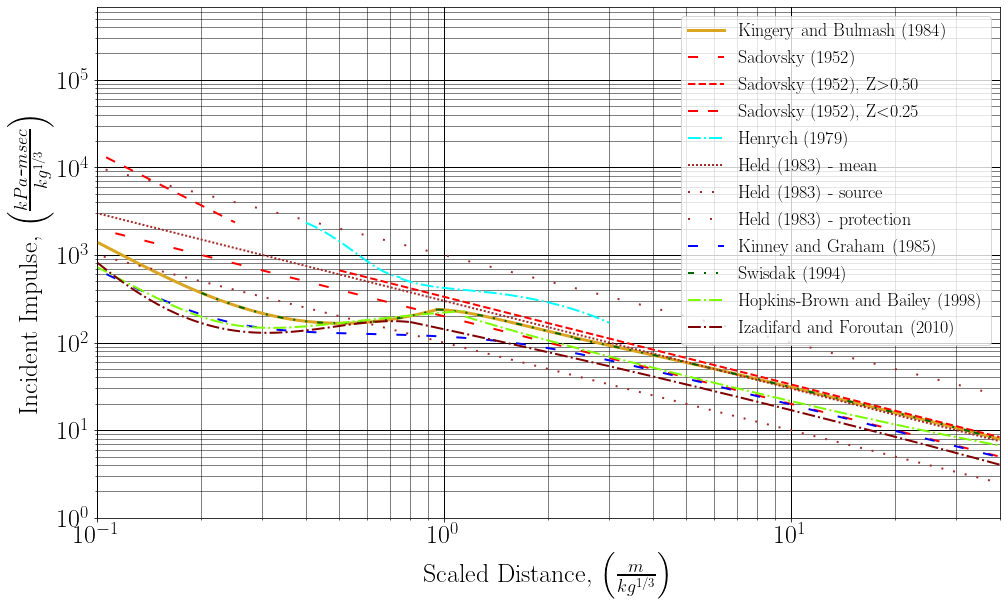

In [26]:
pltfont = {'fontname':'serif', 'fontsize':'16'}
fig, ax = plt.subplots(figsize=(w, h))

plt.grid(b=True, which='major', color='black', linestyle='-', linewidth=1)
plt.grid(b=True, which='minor', color='black', linestyle='-', linewidth=.5)
#plt.ylim(0.01,100)
plt.xlim(0.1,40)
# Kingery and Bulmasn (1984) ##########
plt.loglog(T1,Y1,color='goldenrod',linewidth=3.0, label='Kingery and Bulmash (1984)');
plt.loglog(T2,Y2,color='goldenrod',linewidth=3.0);

# Sadovsky (1952) #####################
plt.loglog(R_s1b,i_s1b,color='red',linewidth=2.0, linestyle = (0, (5, 10)), label='Sadovsky (1952)');
plt.loglog(R_s1a,i_s1a,color='red',linewidth=2.0, linestyle = 'dashed', label='Sadovsky (1952), Z$>$0.50');
plt.loglog(R_s1c,i_s1c,color='red',linewidth=2.0, linestyle = (0, (5, 5)),label='Sadovsky (1952), Z$<$0.25');

# Henrych #############################
plt.loglog(R_s2a,i_s2a,color='cyan',linewidth=2.0, linestyle='-.', label='Henrych (1979)');
plt.loglog(R_s2b,i_s2b,color='cyan',linewidth=2.0, linestyle='-.');

# Held ################################
plt.loglog(R,i_s3a,color='brown',linewidth=2.0, linestyle=(0,(1,1)), label='Held (1983) - mean');
plt.loglog(R,i_s3b,color='brown',linewidth=2.0, linestyle=(0,(1,5)), label='Held (1983) - source');
plt.loglog(R,i_s3c,color='brown',linewidth=2.0, linestyle=(0,(1,10)), label='Held (1983) - protection');

# Kinnery and Graham (1985) ###########
plt.loglog(R,i_s4,color='blue',linewidth=2.0, linestyle=(0, (5, 10)), label='Kinney and Graham (1985)');

# Swisdak #############################
plt.loglog(z51,i_s51,color='darkgreen',linewidth=2.0,linestyle=(0, (3, 5, 1, 5, 1, 5)), label='Swisdak (1994)');
plt.loglog(z52,i_s52,color='darkgreen',linewidth=2.0,linestyle=(0, (3, 5, 1, 5, 1, 5)));
plt.loglog(z53,i_s53,color='darkgreen',linewidth=2.0,linestyle=(0, (3, 5, 1, 5, 1, 5)));
plt.loglog(z54,i_s54,color='darkgreen',linewidth=2.0,linestyle=(0, (3, 5, 1, 5, 1, 5)));

# Hopkins-Brown and Bailey (1998)
plt.loglog(z61,i_s61,color='lawngreen',linewidth=2.0, linestyle='-.', label='Hopkins-Brown and Bailey (1998)');
plt.loglog(z62,i_s62,color='lawngreen',linewidth=2.0, linestyle='-.');

#Izadifard and Foroutan (2010)
plt.loglog(z71,i_s71,color='maroon',linewidth=2.0, linestyle='-.', label='Izadifard and Foroutan (2010)');
plt.loglog(z72,i_s72,color='maroon',linewidth=2.0, linestyle='-.');


plt.ylabel(r'Incident Impulse, $\left(\frac{kPa\textit{-}msec}{kg^{1/3}}\right)$')
plt.xlabel(r'Scaled Distance, $\left(\frac{m}{kg^{1/3}}\right)$')
plt.tight_layout()
ax.legend(fontsize='x-small', loc=0)

working_dir = os.path.join(os.path.expanduser("~"), "Documents/github/comprehensive/")

data_path = "5_reports/figures"
file_name = "fig_ii_all-others_data.png"
filePath = os.path.join(working_dir, data_path, file_name)
plt.savefig(filePath)

plt.show()

$$Z = 1\frac{ft}{\sqrt[3]{lb}}\times\frac{0.3048m}{1ft}\times\frac{\sqrt[3]{lb}}{\sqrt[3]{0.453592kg}}=0.396698\frac{m}{\sqrt[3]{kg}}$$